In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
df=pd.read_csv('WorldPopulation2023.csv')
df.head(15)

,Rank,Country,Population2023,YearlyChange,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop%,WorldShare
0,36,Afghanistan,42239854,2.70 %,1111083,65,652860,-65846,4.4,17.0,26 %,0.53 %
1,138,Albania,2832439,-0.35 %,-9882,103,27400,-8000,1.4,38.0,67 %,0.04 %
2,34,Algeria,45606480,1.57 %,703255,19,2381740,-9999,2.8,28.0,75 %,0.57 %
3,212,American Samoa,43914,-0.81 %,-359,220,200,-790,2.2,29.0,N.A.,0.00 %
4,202,Andorra,80088,0.33 %,264,170,470,200,1.1,43.0,85 %,0.00 %
5,42,Angola,36684202,3.08 %,1095215,29,1246700,-1000,5.1,16.0,68 %,0.46 %
6,223,Anguilla,15899,0.26 %,42,177,90,0,1.3,38.0,98 %,0.00 %
7,200,Antigua and Barbuda,94298,0.57 %,535,214,440,0,1.6,36.0,28 %,0.00 %
8,33,Argentina,45773884,0.58 %,263566,17,2736690,3718,1.9,32.0,94 %,0.57 %
9,140,Armenia,2777970,-0.09 %,-2499,98,28470,-5000,1.6,35.0,67 %,0.03 %


In [3]:
df.isnull().sum()

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         1
MedianAge         1
UrbanPop%         0
WorldShare        0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            234 non-null    int64  
 1   Country         234 non-null    object 
 2   Population2023  234 non-null    int64  
 3   YearlyChange    234 non-null    object 
 4   NetChange       234 non-null    int64  
 5   Density(P/Km²)  234 non-null    int64  
 6   Land Area(Km²)  234 non-null    int64  
 7   Migrants(net)   234 non-null    int64  
 8   Fert.Rate       233 non-null    float64
 9   MedianAge       233 non-null    float64
 10  UrbanPop%       234 non-null    object 
 11  WorldShare      234 non-null    object 
dtypes: float64(2), int64(6), object(4)
memory usage: 22.1+ KB


In [5]:
df['Fert.Rate'].fillna(df['Fert.Rate'].mean(),inplace=True)

In [6]:
df.isnull().sum()

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         0
MedianAge         1
UrbanPop%         0
WorldShare        0
dtype: int64

In [7]:
df=df.dropna()

In [8]:
df.isnull().sum()

Rank              0
Country           0
Population2023    0
YearlyChange      0
NetChange         0
Density(P/Km²)    0
Land Area(Km²)    0
Migrants(net)     0
Fert.Rate         0
MedianAge         0
UrbanPop%         0
WorldShare        0
dtype: int64

In [9]:
df.shape

(233, 12)

In [10]:
x=df['UrbanPop%'].str.split("%")
df['UrbanPop%']=x.str[0]
df['UrbanPop%'].values

array(['26 ', '67 ', '75 ', 'N.A.', '85 ', '68 ', '98 ', '28 ', '94 ',
       '67 ', '45 ', '86 ', '59 ', '57 ', '85 ', 'N.A.', '41 ', '32 ',
       '80 ', '99 ', '48 ', '48 ', '94 ', '49 ', '69 ', '54 ', '69 ',
       '88 ', '53 ', '80 ', '78 ', '32 ', '15 ', '67 ', '26 ', '58 ',
       '81 ', '74 ', '95 ', '40 ', '24 ', '85 ', '65 ', '81 ', '33 ',
       '70 ', '79 ', '82 ', '59 ', '80 ', '77 ', '65 ', '75 ', '52 ',
       '88 ', '72 ', '75 ', '85 ', '46 ', '64 ', '41 ', '78 ', '67 ',
       '67 ', '68 ', '31 ', '22 ', '41 ', '62 ', '59 ', '87 ', '84 ',
       '90 ', '59 ', '85 ', '58 ', '63 ', '77 ', '57 ', 'N.A.', '86 ',
       '89 ', '32 ', 'N.A.', '95 ', '55 ', '40 ', '45 ', '27 ', '60 ',
       '58 ', 'N.A.', '68 ', '88 ', '36 ', '59 ', '74 ', '71 ', '64 ',
       '55 ', '92 ', '72 ', '59 ', '94 ', '85 ', '57 ', '31 ', '56 ',
       'N.A.', '37 ', '37 ', '69 ', '97 ', '31 ', '54 ', '82 ', '15 ',
       '71 ', '88 ', '97 ', '40 ', '19 ', '78 ', '39 ', '44 ', '78 ',
       'N.A.',

In [11]:
x=df['WorldShare'].str.split("%")
df['WorldShare']=x.str[0]
df['WorldShare'].values

array(['0.53 ', '0.04 ', '0.57 ', '0.00 ', '0.00 ', '0.46 ', '0.00 ',
       '0.00 ', '0.57 ', '0.03 ', '0.00 ', '0.33 ', '0.11 ', '0.13 ',
       '0.01 ', '0.02 ', '2.15 ', '0.00 ', '0.12 ', '0.15 ', '0.01 ',
       '0.17 ', '0.00 ', '0.01 ', '0.15 ', '0.04 ', '0.03 ', '2.69 ',
       '0.00 ', '0.01 ', '0.08 ', '0.29 ', '0.16 ', '0.01 ', '0.21 ',
       '0.36 ', '0.48 ', '0.00 ', '0.00 ', '0.07 ', '0.23 ', '0.24 ',
       '17.72 ', '0.65 ', '0.01 ', '0.08 ', '0.00 ', '0.06 ', '0.05 ',
       '0.14 ', '0.00 ', '0.02 ', '0.13 ', '0.36 ', '0.07 ', '0.01 ',
       '0.00 ', '0.14 ', '1.27 ', '0.23 ', '1.40 ', '0.08 ', '0.02 ',
       '0.05 ', '0.02 ', '0.02 ', '1.57 ', '0.00 ', '0.00 ', '0.01 ',
       '0.07 ', '0.80 ', '0.00 ', '0.00 ', '0.03 ', '0.03 ', '0.05 ',
       '1.04 ', '0.42 ', '0.00 ', '0.13 ', '0.00 ', '0.00 ', '0.00 ',
       '0.00 ', '0.22 ', '0.18 ', '0.03 ', '0.01 ', '0.15 ', '0.13 ',
       '0.09 ', '0.13 ', '0.00 ', '17.76 ', '3.45 ', '1.11 ', '0.57 ',
       '0.06 ', '0

In [12]:

df['UrbanPop%'].replace('N.A.','0',inplace=True)
 

In [13]:
df['UrbanPop%'].values

array(['26 ', '67 ', '75 ', '0', '85 ', '68 ', '98 ', '28 ', '94 ', '67 ',
       '45 ', '86 ', '59 ', '57 ', '85 ', '0', '41 ', '32 ', '80 ', '99 ',
       '48 ', '48 ', '94 ', '49 ', '69 ', '54 ', '69 ', '88 ', '53 ',
       '80 ', '78 ', '32 ', '15 ', '67 ', '26 ', '58 ', '81 ', '74 ',
       '95 ', '40 ', '24 ', '85 ', '65 ', '81 ', '33 ', '70 ', '79 ',
       '82 ', '59 ', '80 ', '77 ', '65 ', '75 ', '52 ', '88 ', '72 ',
       '75 ', '85 ', '46 ', '64 ', '41 ', '78 ', '67 ', '67 ', '68 ',
       '31 ', '22 ', '41 ', '62 ', '59 ', '87 ', '84 ', '90 ', '59 ',
       '85 ', '58 ', '63 ', '77 ', '57 ', '0', '86 ', '89 ', '32 ', '0',
       '95 ', '55 ', '40 ', '45 ', '27 ', '60 ', '58 ', '0', '68 ', '88 ',
       '36 ', '59 ', '74 ', '71 ', '64 ', '55 ', '92 ', '72 ', '59 ',
       '94 ', '85 ', '57 ', '31 ', '56 ', '0', '37 ', '37 ', '69 ', '97 ',
       '31 ', '54 ', '82 ', '15 ', '71 ', '88 ', '97 ', '40 ', '19 ',
       '78 ', '39 ', '44 ', '78 ', '0', '94 ', '61 ', '40 ', '40 ',

In [14]:
df['WorldShare']=df['WorldShare'].astype(float)
df['UrbanPop%']=df['UrbanPop%'].astype(float)

In [15]:
df.drop('Country',axis=1,inplace=True)
df.drop('YearlyChange',axis=1,inplace=True)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233 entries, 0 to 233
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Rank            233 non-null    int64  
 1   Population2023  233 non-null    int64  
 2   NetChange       233 non-null    int64  
 3   Density(P/Km²)  233 non-null    int64  
 4   Land Area(Km²)  233 non-null    int64  
 5   Migrants(net)   233 non-null    int64  
 6   Fert.Rate       233 non-null    float64
 7   MedianAge       233 non-null    float64
 8   UrbanPop%       233 non-null    float64
 9   WorldShare      233 non-null    float64
dtypes: float64(4), int64(6)
memory usage: 20.0 KB


In [17]:
df.corr()

,Rank,Population2023,NetChange,Density(P/Km²),Land Area(Km²),Migrants(net),Fert.Rate,MedianAge,UrbanPop%,WorldShare
Rank,1.000000,-0.360130,-0.398503,0.121130,-0.392176,-0.006075,-0.232427,0.260929,-0.140351,-0.360361
Population2023,-0.360130,1.000000,0.620984,-0.024989,0.451570,-0.169401,-0.035498,-0.009930,0.012574,0.999999
NetChange,-0.398503,0.620984,1.000000,-0.031632,0.170647,-0.301640,0.268418,-0.284370,-0.120987,0.621024
Density(P/Km²),0.121130,-0.024989,-0.031632,1.000000,-0.058659,-0.003889,-0.119682,0.200981,-0.096689,-0.025041
Land Area(Km²),-0.392176,0.451570,0.170647,-0.058659,1.000000,0.087934,-0.021915,0.020464,0.150037,0.451720
Migrants(net),-0.006075,-0.169401,-0.301640,-0.003889,0.087934,1.000000,-0.057052,0.099523,0.082678,-0.169306
Fert.Rate,-0.232427,-0.035498,0.268418,-0.119682,-0.021915,-0.057052,1.000000,-0.853667,-0.271710,-0.035411
MedianAge,0.260929,-0.009930,-0.284370,0.200981,0.020464,0.099523,-0.853667,1.000000,0.216558,-0.010099
UrbanPop%,-0.140351,0.012574,-0.120987,-0.096689,0.150037,0.082678,-0.271710,0.216558,1.000000,0.012704
WorldShare,-0.360361,0.999999,0.621024,-0.025041,0.451720,-0.169306,-0.035411,-0.010099,0.012704,1.000000


In [18]:
corelation=df['Population2023'].corr(df['NetChange'])
corelation

0.620983609549096

<Axes: xlabel='Population2023', ylabel='NetChange'>

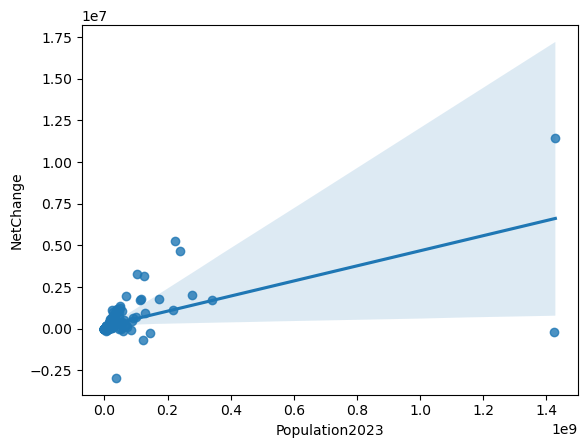

In [19]:
sns.regplot(x=df['Population2023'],y=df['NetChange'],data=df)

In [20]:
corelation=df['Population2023'].corr(df['Land Area(Km²)'])
corelation

0.4515702230663885

<Axes: xlabel='Population2023', ylabel='Land Area(Km²)'>

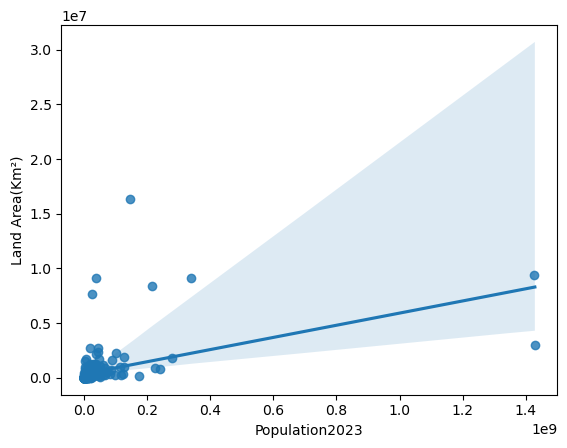

In [21]:
sns.regplot(x=df['Population2023'],y=df['Land Area(Km²)'],data=df)

In [22]:
corelation=df['Population2023'].corr(df['WorldShare'])
corelation

0.9999986965817584

<Axes: xlabel='Population2023', ylabel='WorldShare'>

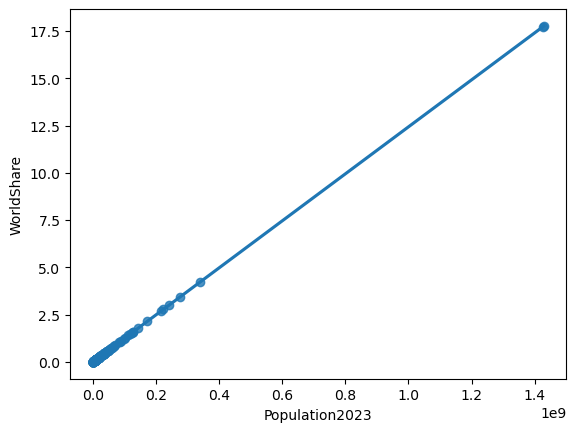

In [23]:
sns.regplot(x=df['Population2023'],y=df['WorldShare'],data=df)

In [24]:
corelation=df['Land Area(Km²)'].corr(df['WorldShare'])
corelation

0.4517200464625122

<Axes: xlabel='WorldShare', ylabel='Land Area(Km²)'>

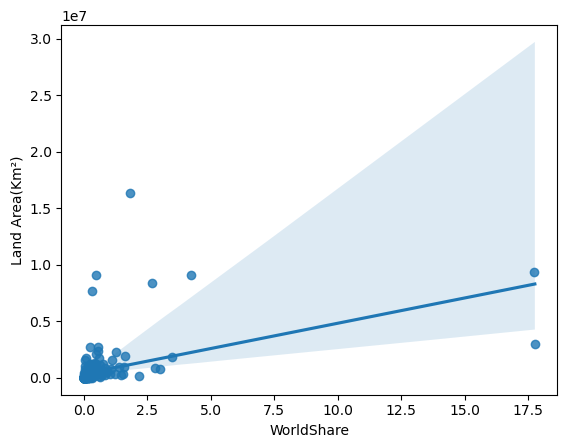

In [25]:
sns.regplot(x=df['WorldShare'],y=df['Land Area(Km²)'],data=df)

In [26]:
corelation=df['MedianAge'].corr(df['Fert.Rate'])
corelation

-0.8536665517851585

<Axes: xlabel='MedianAge', ylabel='Fert.Rate'>

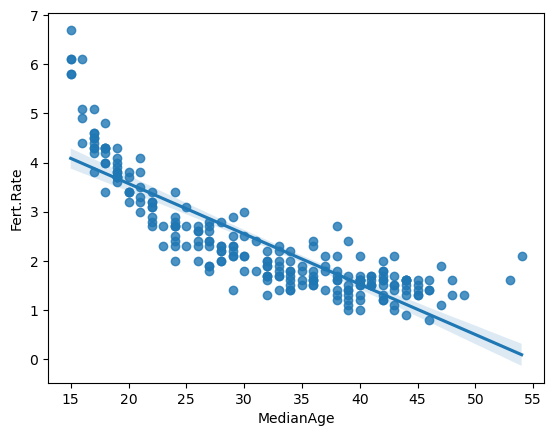

In [27]:
sns.regplot(x=df['MedianAge'],y=df['Fert.Rate'],data=df)

In [28]:
df.columns


Index(['Rank', 'Population2023', 'NetChange', 'Density(P/Km²)',
       'Land Area(Km²)', 'Migrants(net)', 'Fert.Rate', 'MedianAge',
       'UrbanPop%', 'WorldShare'],
      dtype='object')

# now creating a predictive model

<function matplotlib.pyplot.show(close=None, block=None)>

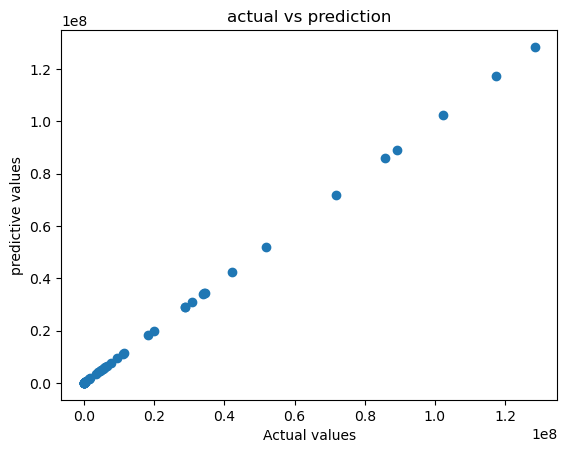

In [41]:
X=df[[ 'Population2023','NetChange','Land Area(Km²)', 'Migrants(net)', 'Fert.Rate', 'WorldShare']]
y=df['Population2023']


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

model=LinearRegression()
model.fit(X_train,y_train)

train_score = model.score(X_train,y_train)
test_score=model.score(X_test,y_test)

predictions=model.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Actual values')
plt.ylabel('predictive values')
plt.title('actual vs prediction')
plt.show

# we can use different features or columns to target the prediction which we want